In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
kperry = pd.read_csv("Youtube02-KatyPerry.csv")  
kperry

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12pgdhovmrktzm3i23es5d5junftft3f,lekanaVEVO1,2014-07-22T15:27:50,i love this so much. AND also I Generate Free ...,1
1,z13yx345uxepetggz04ci5rjcxeohzlrtf4,Pyunghee,2014-07-27T01:57:16,http://www.billboard.com/articles/columns/pop-...,1
2,z12lsjvi3wa5x1vwh04cibeaqnzrevxajw00k,Erica Ross,2014-07-27T02:51:43,Hey guys! Please join me in my fight to help a...,1
3,z13jcjuovxbwfr0ge04cev2ipsjdfdurwck,Aviel Haimov,2014-08-01T12:27:48,http://psnboss.com/?ref=2tGgp3pV6L this is the...,1
4,z13qybua2yfydzxzj04cgfpqdt2syfx53ms0k,John Bello,2014-08-01T21:04:03,Hey everyone. Watch this trailer!!!!!!!! http...,1
...,...,...,...,...,...
345,z12sjp3zgtqnvlysj23zuxxaolrvd1oj504,Kacy Cluley,2015-06-05T18:59:52,This song means so much to me thank you soooo...,0
346,z132enrpoy35yxpoe04cjr4zur3jvbyq3xo0k,Kasia Fabisiewicz,2015-06-05T19:02:05,&lt;3﻿,0
347,z132jbmxfqm4fjysg23nwjfb2mv2vxnua,Decio Alves Martins,2015-06-05T19:29:20,"KATY PERRY, I AM THE ""DÉCIO CABELO"", ""DECIO HA...",1
348,z12cdlswetvnejcri04cex0jfwy2u3tzj54,Rafi Hossain,2015-06-05T19:55:08,Honestly speaking except taylor swift and adel...,0


In [3]:
kperry.drop(columns=['COMMENT_ID', 'AUTHOR','DATE'], inplace = True)
kperry   #spam = 1, ham(legimimate) = 0

,CONTENT,CLASS
0,i love this so much. AND also I Generate Free ...,1
1,http://www.billboard.com/articles/columns/pop-...,1
2,Hey guys! Please join me in my fight to help a...,1
3,http://psnboss.com/?ref=2tGgp3pV6L this is the...,1
4,Hey everyone. Watch this trailer!!!!!!!! http...,1
...,...,...
345,This song means so much to me thank you soooo...,0
346,&lt;3﻿,0
347,"KATY PERRY, I AM THE ""DÉCIO CABELO"", ""DECIO HA...",1
348,Honestly speaking except taylor swift and adel...,0


In [4]:
kperry.isna().any()

CONTENT    False
CLASS      False
dtype: bool

In [5]:
kperry.drop_duplicates(inplace = True)
kperry.duplicated().sum()

0

In [6]:
kperry[kperry['CLASS']== 1].count()

CONTENT    175
CLASS      175
dtype: int64

In [7]:
# ham
kperry[kperry['CLASS'] == 0].count()

CONTENT    173
CLASS      173
dtype: int64

## Data Preprocessing

In [8]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [9]:
'''
Create a function that
- changes all the words to lower case
- tokenize the words
- remove special characters
- remove stop words and punctuation
- stemming

'''

def text_processing(CONTENT):
    text = CONTENT.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    for j in text:
        if j not in stopwords.words('english') and i not in string.punctuation:
            y.append(j)
    text = y[:]
    y.clear()

    for w in text:
     #   y.append(ps.stem(w))     incase for stemming
        y.append(w)
    return " ".join(y)

In [10]:
#Adding a new column for the processed text from the content column
kperry['TEXT_PROCESSED'] = kperry['CONTENT'].apply(text_processing)
kperry.head(20)

,CONTENT,CLASS,TEXT_PROCESSED
0,i love this so much. AND also I Generate Free ...,1,love much also generate free leads auto pilot ...
1,http://www.billboard.com/articles/columns/pop-...,1,http vote sones please vips please help us gt lt
2,Hey guys! Please join me in my fight to help a...,1,hey guys please join fight help animals fund g...
3,http://psnboss.com/?ref=2tGgp3pV6L this is the...,1,http
4,Hey everyone. Watch this trailer!!!!!!!! http...,1,hey everyone watch trailer http
5,check out my rapping hope you guys like it ht...,1,check rapping hope guys like https follow message
6,"Subscribe pleaaaase to my instagram account , ...",1,subscribe pleaaaase instagram account subscrib...
7,hey guys!! visit my channel pleaase (i'm searc...,1,hey guys visit channel pleaase searching dream
8,Nice! http://www.barnesandnoble.com/s/BDP?csrf...,1,nice http amp amp amp amp amp amp
9,http://www.twitch.tv/daconnormc﻿,1,http


## Model Building
Algorithm used are
- Support Vector Classification(Linear, Polynomial, Gaussian)
- The Naive Bayes Method(Multinomial, Bernouli, Gaussian)
- Random Forest
- Decision Tree(CART)
- KNNeighbor
- Logistics Regression

In [11]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 3000 )
X = tfidf.fit_transform(kperry['TEXT_PROCESSED']).toarray()
y = kperry['CLASS'].values
#X.shape
#X = CountVectorizer(analyzer=text_processing).fit_transform(psy['CONTENT'])
#bag_of_words.shape
X.shape


(348, 1129)

In [12]:
'''
splitting the data into training and testing set 
importing the necessary library for the Supervised Techniques and checking the accuracy/validity of the model
'''
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state= 0)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score, matthews_corrcoef

In [13]:
svc_Linear = SVC()
svc_Polynomial = SVC(kernel='poly')
svc_Gaussian = SVC(kernel='rbf')
knc = KNeighborsClassifier(n_neighbors=3)
dtc = DecisionTreeClassifier()
lrc = LogisticRegression(solver='liblinear')
rfc = RandomForestClassifier(n_estimators=80)
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [14]:
clfs = {
    'SVM_Linear' : svc_Linear,
    'SVM_Polynomial' : svc_Polynomial,
    'SVM_Gaussian' : svc_Gaussian,
    'KNNeighbor' : knc, 
    'CART': dtc, 
    'LogisticsRegression': lrc, 
    'RandomForest': rfc, 
    'GaussianNB': gnb,
    'MultinomialNB': mnb,
    'BernoulliNB':bnb
}

In [15]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    f_score = f1_score(y_test, y_pred)
    con_matrices =confusion_matrix(y_test,y_pred)
    return accuracy,precision,f_score,con_matrices

## Model Performance(UnOptimized)
- Matthew correlation Coefficient
- Accuracy
- Precision
- F_score
- Confusion Matrix

In [16]:
'''
   Using the Matthews correlation coefficient
'''

mcc_scores = []
for name, clf in clfs.items():
    clf.fit(X_train,y_train)
    current_mcc = matthews_corrcoef(y_test,clf.predict(X_test))
   
    print("==================")
    print(name)
    print(current_mcc)
    mcc_scores.append(current_mcc)


'''
    Checking the Accuracy, Precision, F-score and the confusion Matrix
'''

accuracy_scores = []
precision_scores = []
f1_scores = []
confusion_matrices = []
for name,clf in clfs.items():
    
    current_accuracy,current_precision,current_f1_score, confusion_matrice = train_classifier(clf, X_train,y_train,X_test,y_test)
    print('--------------------------------')
    print(name)
    print("Accuracy ",current_accuracy)
    print("Precision - ",current_precision)
    print("f1_scores" , current_f1_score) 
    print('Confusion Matrix\n ',confusion_matrice)  
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    f1_scores.append(current_f1_score)
    confusion_matrices.append(confusion_matrice)

    print('--------------------------------')

SVM_Linear
0.8918918918918919
SVM_Polynomial
0.5764316524276827
SVM_Gaussian
0.8918918918918919
KNNeighbor
0.40778049119200566
CART
0.9177921019176088
LogisticsRegression
0.944400281603035
RandomForest
0.9717798726186446
GaussianNB
0.5413595413595413
MultinomialNB
0.8853398853398854
BernoulliNB
0.6821546013313323
--------------------------------
SVM_Linear
Accuracy  0.9428571428571428
Precision -  1.0
f1_scores 0.9428571428571428
Confusion Matrix
  [[33  0]
 [ 4 33]]
--------------------------------
--------------------------------
SVM_Polynomial
Accuracy  0.7428571428571429
Precision -  1.0
f1_scores 0.6785714285714285
Confusion Matrix
  [[33  0]
 [18 19]]
--------------------------------
--------------------------------
SVM_Gaussian
Accuracy  0.9428571428571428
Precision -  1.0
f1_scores 0.9428571428571428
Confusion Matrix
  [[33  0]
 [ 4 33]]
--------------------------------
--------------------------------
KNNeighbor
Accuracy  0.6285714285714286
Precision -  1.0
f1_scores 0.4583333

In [17]:
'''
    Arranging the performance based on the Matthew correlation coefficient in descending order for each Algorithm
'''
performance_kperry = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores, 'F_scores':f1_scores, 'MCC_scores': mcc_scores}).sort_values('MCC_scores', ascending=False)
performance_kperry

,Algorithm,Accuracy,Precision,F_scores,MCC_scores
6,RandomForest,0.985714,1.000000,0.986301,0.971780
5,LogisticsRegression,0.971429,1.000000,0.972222,0.944400
4,CART,0.971429,1.000000,0.972222,0.917792
0,SVM_Linear,0.942857,1.000000,0.942857,0.891892
2,SVM_Gaussian,0.942857,1.000000,0.942857,0.891892
8,MultinomialNB,0.942857,0.945946,0.945946,0.885340
9,BernoulliNB,0.814286,1.000000,0.786885,0.682155
1,SVM_Polynomial,0.742857,1.000000,0.678571,0.576432
7,GaussianNB,0.771429,0.783784,0.783784,0.541360
3,KNNeighbor,0.628571,1.000000,0.458333,0.407780


<AxesSubplot:xlabel='Algorithm'>

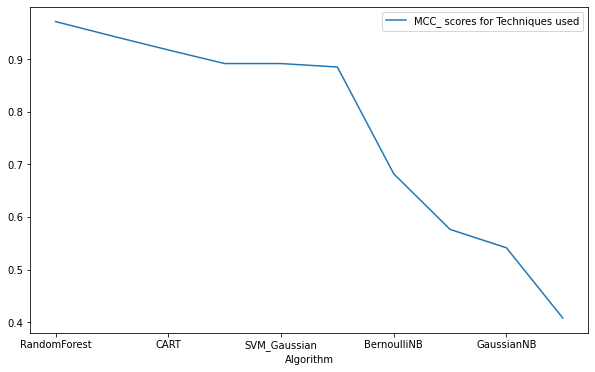

In [18]:
performance_kperry.plot(x='Algorithm', y='MCC_scores', label='MCC_ scores for Techniques used', figsize = [10,6] )

## TUNING RESULT USING GRID SEARCH  

In [19]:
'''
    Tuning the support vectors for Linear, Polynomial and Gaussian to give the optimal parameter
'''
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
param_grid = [
    {
        'C':[0.5,1,10,100,0.1,0.01],
        'gamma':['scale',1, 0.1, 0.01, 0.001, 0.0001],
        'kernel':['rbf'] # ['rbf','poly','linear']
    }
]
optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=10,
    scoring='accuracy',
    verbose=0
)
C,g,k = optimal_params.fit(X_train, y_train).best_params_.values()
print(f"-----------")
print(f"C = {C}")
print(f"gamma = {g}")
print(f"kernel = {k}")


-----------
C = 100
gamma = 0.01
kernel = rbf


In [20]:

'''
    Tuning the Naive Bayes method for Bernoulli, Multinomial and Gaussian to give the optimal parameter
'''

param_grid_nb = {
        'var_smoothing': np.logspace(0, -9, num = 100)
    }

optimal_params = GridSearchCV(estimator = GaussianNB(),param_grid= param_grid_nb,
    cv=10,
    scoring='accuracy',
    verbose=1
) # [multinomialNB, GaussianNB, BernouliNB]
optimal_params.fit(X_train, y_train)
print(optimal_params.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.012328467394420659)


In [21]:

'''
    Tuning the Naive Bayes method for KNNeigbor
'''

param_grid_knn = {
        'n_neighbors': [1,3,5,7,9]
    }

optimal_params = GridSearchCV(estimator = KNeighborsClassifier(),param_grid= param_grid_knn,
    cv=10,
    scoring='accuracy',
    verbose=0
) 
optimal_params.fit(X_train, y_train)
print(optimal_params.best_estimator_)


KNeighborsClassifier(n_neighbors=9)


In [22]:
'''
    Tuning the RandomForest 
'''

param_grid_rfc = {
        'n_estimators': [20,40,60,80,100]
    }

optimal_params = GridSearchCV(estimator = RandomForestClassifier(),param_grid= param_grid_rfc,
    cv=10,
    scoring='accuracy',
    verbose=0
) 
optimal_params.fit(X_train, y_train)
print(optimal_params.best_estimator_)



RandomForestClassifier(n_estimators=80)


In [23]:
'''
    Tuning the RandomForest 
'''
param_grid_lrc = [
{
        'C': [10, 15,20,30],
     }

]

optimal_params = GridSearchCV(estimator = LogisticRegression(),param_grid= param_grid_lrc,
    cv=10,
    scoring='accuracy',
    verbose=0
) 
optimal_params.fit(X_train, y_train)
print(optimal_params.best_estimator_)


LogisticRegression(C=10)


In [24]:
'''
    Tuning the Decision Tree (CART) 
'''
param_grid_dtc = [
{
        'criterion': ["gini"],
        'random_state':[None, 1,2,4,8,10]
     }

]

optimal_params = GridSearchCV(estimator = DecisionTreeClassifier(),param_grid= param_grid_dtc,
    cv= 10,
    scoring ='accuracy',
    verbose=0
) 
optimal_params.fit(X_train, y_train)
print(optimal_params.best_estimator_)

DecisionTreeClassifier()


## OPTIMIZED MODEL(Performance)

             Algorithm  Accuracy  Precision  F_scores  MCC_scores
6         RandomForest  0.985714   1.000000  0.986301    0.971780
5  LogisticsRegression  0.971429   1.000000  0.972222    0.944400
4                 CART  0.971429   1.000000  0.972222    0.917792
0           SVM_Linear  0.942857   1.000000  0.942857    0.891892
2         SVM_Gaussian  0.942857   1.000000  0.942857    0.891892
8        MultinomialNB  0.942857   0.945946  0.945946    0.885340
9          BernoulliNB  0.814286   1.000000  0.786885    0.682155
1       SVM_Polynomial  0.742857   1.000000  0.678571    0.576432
7           GaussianNB  0.771429   0.783784  0.783784    0.541360
3           KNNeighbor  0.628571   1.000000  0.458333    0.407780


<AxesSubplot:xlabel='Algorithm'>

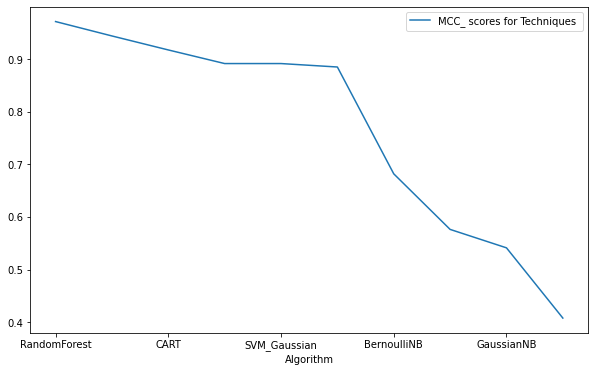

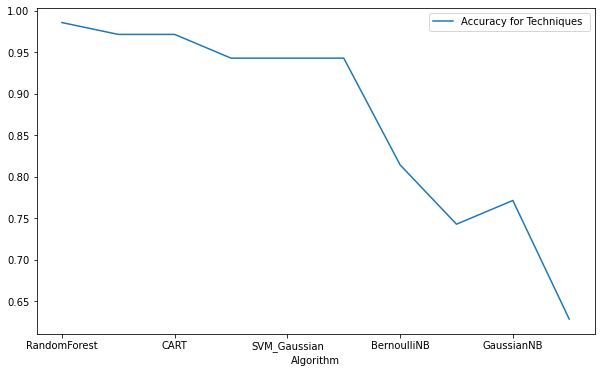

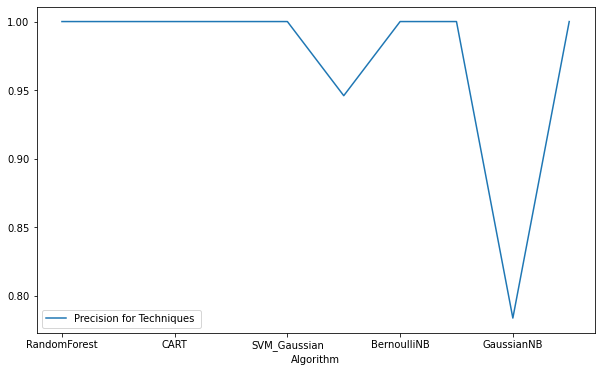

In [25]:
svc_Linear = SVC(kernel='linear', C=1, gamma = "scale")
svc_Polynomial = SVC(kernel='poly', C= 1, gamma = "scale")
svc_Gaussian = SVC(kernel='sigmoid',C = 10, gamma= 0.1)
knc = KNeighborsClassifier(n_neighbors=9, algorithm= "auto")
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(random_state=4)
lrc = LogisticRegression(solver='liblinear', penalty='l1', C = 10)
rfc = RandomForestClassifier(n_estimators=60, random_state=80)
gnb = GaussianNB( var_smoothing=0.012328467394420659)
bnb = BernoulliNB()

clfs = {
    'SVM_Linear' : svc_Linear,
    'SVM_Polynomial' : svc_Polynomial,
    'SVM_Gaussian' : svc_Gaussian,
    'KNNeighbor' : knc, 
    'CART': dtc, 
    'LogisticsRegression': lrc, 
    'RandomForest': rfc, 
    'GaussianNB': gnb,
    'MultinomialNB': mnb,
    'BernoulliNB':bnb
}

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    f_score = f1_score(y_test, y_pred)
    con_matrices =confusion_matrix(y_test,y_pred)
    return accuracy,precision,f_score,con_matrices

'''
    Arranging the performance based on the Matthew correlation coefficient in descending order for each Algorithm
'''
performance_kperry = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores, 'F_scores':f1_scores, 'MCC_scores': mcc_scores}).sort_values('MCC_scores', ascending=False)
print(performance_kperry)

performance_kperry.plot(x='Algorithm', y='MCC_scores', label='MCC_ scores for Techniques ', figsize = [10,6] )

performance_kperry.plot(x='Algorithm', y='Accuracy', label='Accuracy for Techniques ', figsize = [10,6] )

performance_kperry.plot(x='Algorithm', y='Precision', label='Precision for Techniques ', figsize = [10,6] )

<AxesSubplot:>

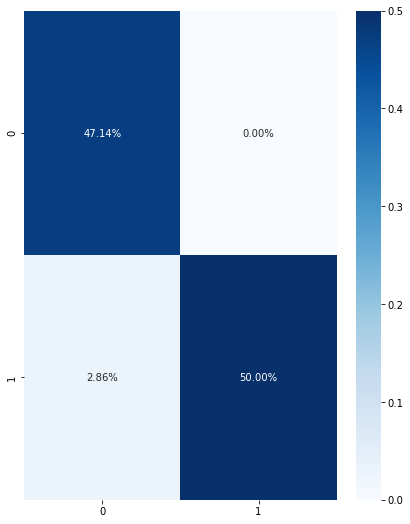

In [26]:
import seaborn as sns
'''
    A Heatmap confusion matrix for the predicted outcome for Linear support Vector Algorithms
'''
svc_Linear.fit(X_train,y_train)
y_pred_svc = svc_Linear.predict(X_test)
cm = confusion_matrix(y_test,y_pred_svc)
plt.figure(figsize=(7,9) )
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')


<AxesSubplot:>

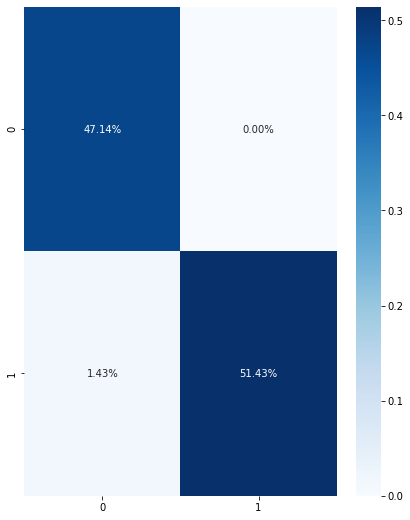

In [27]:
'''
    A Heatmap confusion matrix for the predicted outcome for Linear support Vector Algorithms
'''
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)
cm = confusion_matrix(y_test,y_pred_rfc)
plt.figure(figsize=(7,9))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
